Ayan Karim
Prep Course Capstone
Cryptocurrency Market Exploration

Description of Data

The chosen dataset was found on Kaggle (uploaded by jvent). It contains historic data on all cryptocurrencies. It consists of 13 columns labeled slug (coin’s name), symbol, name (seems redundant), date, ranknow(coin rank), open, high, low, close, volume, market, close ratio and spread. The open, high, low and close are values of the coin at those particular instances, for that date. It’s worth noting that the actual cryptocurrency market is always open, but the “open” and “close” times refer to the time frame for which the global market is the most active. The “market” column refers to the coin's Market Capitalization value, which is basically the measure of a coin's value. More specifically, it's defined as the product of a coin’s stock share and stock price, or in other words, the product of the circulating supply of tokens by their current price. The “spread” is the difference between the high and low value, and the “close rate” is the ratio of the close value subtracted by the low value and the high value subtracted by the low value.

Close Rate=(close-low)/(high-low)

The dataset unfortunately doesn’t encompass all historic data since each coin’s creation. Furthermore, different coins have data beginning on different dates, for example Bitcoin has data since 2013, but Bitcoin Cash only has data since 2017. So, for the purpose of our investigation, we’ll focus on the data for 2018.

This dataset is significant particularly in lieu of the recent craze surrounding what seemed like Bitcoin’s exponential growth. Bitcoin’s value has since dropped to a stable value and leveled off, but the event caught the attention of just about everyone and cryptocurrencies have since become much an increasingly popular topic. However, cryptocurrencies have been around since the creation of Bitcoin in 2009, so there’s a decent amount of historic data on coin activity. Since it’s become so popular, and more individuals look to invest in such a market, it’s worthwhile to investigate the Crypto market so we can have a better understanding of how the market behaves and what the future may entail.

In [1]:
# Crypto Currency descriptive statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
df = pd.read_csv('crypto-markets.csv')
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d', utc=True)

Analytic Question

1.	The dataset gives us a ranking of each cryptocurrency, what characteristics are common or consistent amongst top ranked cryptocurrencies?


In [3]:
crp_market = df[(['date', 'ranknow', 'name', 'market'])]
crp_market = crp_market[(crp_market['date']>='2018-01-01')&(crp_market['ranknow']<=40)]
crp_market = crp_market[(['name', 'market'])]
crp_market = crp_market.groupby('name', sort=False).mean()
crp_market

,market
name,
Bitcoin,1.622820e+11
Ethereum,7.406245e+10
Ripple,3.889269e+10
Bitcoin Cash,2.268930e+10
EOS,7.922506e+09
Litecoin,9.323648e+09
Stellar,6.902536e+09
Cardano,9.472029e+09
IOTA,5.490732e+09


The table above shows the mean Market Capitalization values for each of the top 40 ranked cryptocurrencies in order. Bitcoin's value leads with a market cap of 1.62e+11, which is more than twice as great as second place. The values then seem to decrease as we go down the ranks, despite certain outliers.

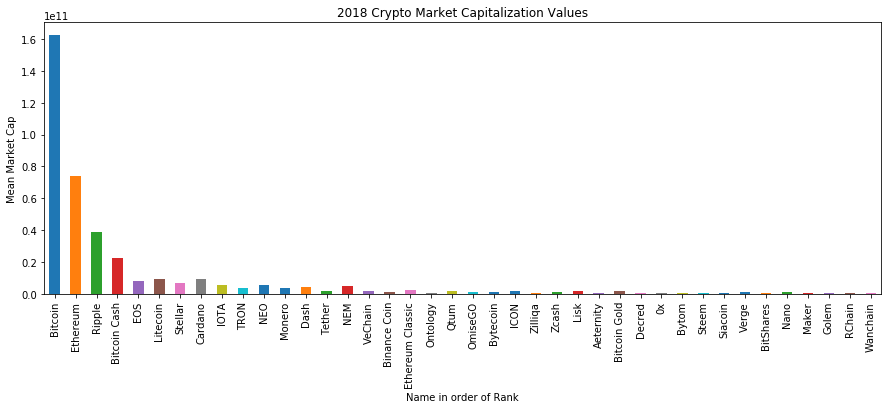

In [4]:
crp_market = df[(['date', 'ranknow', 'name', 'market'])]
crp_market = crp_market[crp_market['date']>='2018-01-01']
crp_market = crp_market.groupby('name').mean()
crp_market = crp_market.sort_values('ranknow')
crp_market = crp_market['market']

ax = crp_market.head(40).plot(kind='bar', title='2018 Crypto Market Capitalization Values', figsize=(15,5))
ax.set_xlabel("Name in order of Rank")
plt.xticks(rotation='vertical')
ax.set_ylabel("Mean Market Cap")
plt.show()

The bar plot above describes the mean Market Capitalization value of the top 40 ranked cryptocurrencies in our data set. The top 40 ranked coins are on the x-axis in order from 1st on the left to 40th and the mean market cap values are placed on the y-axis. As one would expect, we see a positive skew shape showing that the higher the rank of the coin, the higher its mean market cap value. However, if we look closely, certain coins seem to have low market cap values given their rank. For example, EOS (7.92e+09) has a lower mean value than the subsequently ranked Litecoin (9.32e+09) and there are a couple more examples of that as we move right through the ranks.

In [5]:
crp_volume = df[(['date', 'ranknow', 'name', 'volume'])]
crp_volume = crp_volume[(crp_volume['date']>='2018-01-01')&(crp_volume['ranknow']<=40)]
crp_volume = crp_volume[(['name', 'volume'])]
crp_volume = crp_volume.groupby('name', sort=False).mean()
crp_volume

,volume
name,
Bitcoin,8.046107e+09
Ethereum,2.893666e+09
Ripple,1.266534e+09
Bitcoin Cash,8.128522e+08
EOS,1.048327e+09
Litecoin,6.328960e+08
Stellar,1.500358e+08
Cardano,3.019284e+08
IOTA,8.645265e+07


This table shows the volume means for the top 40 coins in order.

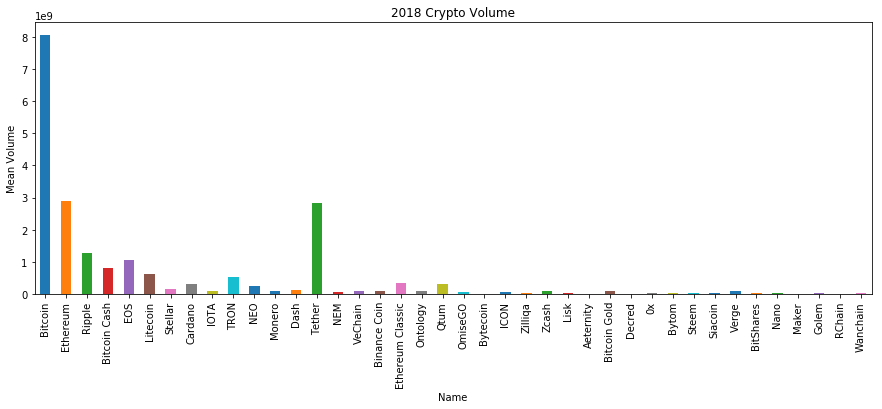

In [6]:
crp_volume = df[(['date', 'ranknow', 'name', 'volume'])]
crp_volume = crp_volume[crp_volume['date']>='2018-01-01']
crp_volume = crp_volume.groupby('name').mean()
crp_volume = crp_volume.sort_values('ranknow')
crp_volume = crp_volume['volume']

ax = crp_volume.head(40).plot(kind='bar', title='2018 Crypto Volume', figsize=(15,5))
ax.set_xlabel("Name")
plt.xticks(rotation='vertical')
ax.set_ylabel("Mean Volume")
plt.show()

If we compare their volume, we observe a similar downward shape from left to right. But there are still many coins whose values are low for their rank. Since their value is based on the product of their price and volume, and this graph only shows their mean volume, the coins may have been ranked from a combination of these different factors. Here EOS has a greater mean volume than the subsequent Litecoin. So it's higher rank is probably attributed to its larger circulation of supply. 

We see an outlier at Tether, who's mean volume seems to be far greater than all other coins except Bitcoin and Etheruem.

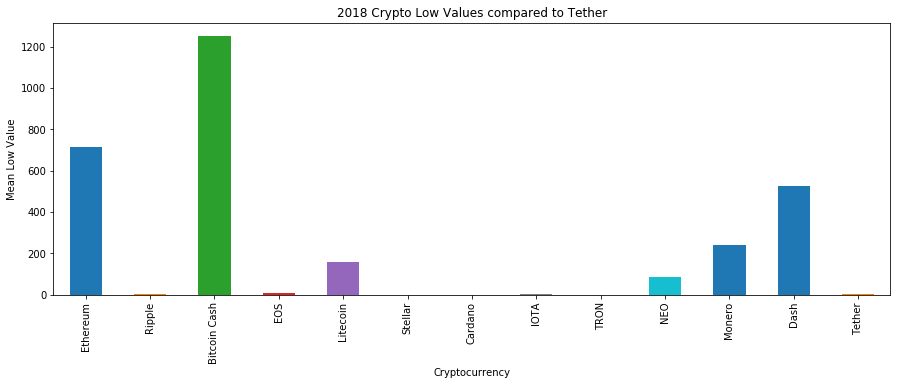

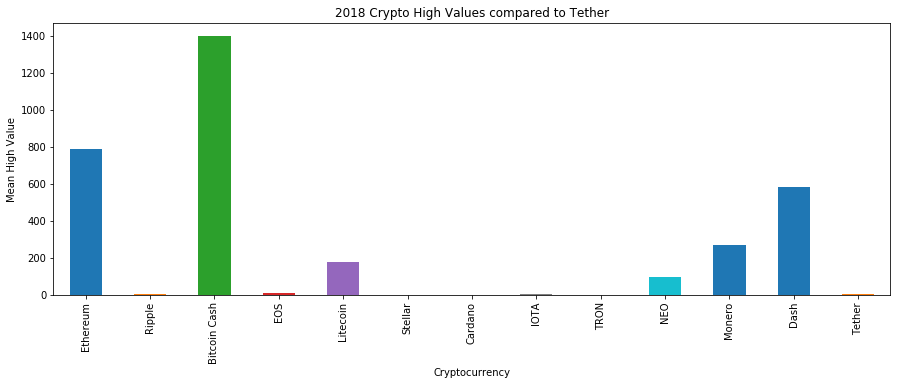

In [7]:
crp_low = df[(df['ranknow']>1)&(df['ranknow']<15)]
crp_low = crp_low[crp_low['date']>='2018-01-01']
crp_low = crp_low.groupby('name').mean()
crp_low = crp_low.sort_values('ranknow')
crp_low = crp_low['low']

ax = crp_low.plot(kind='bar', title='2018 Crypto Low Values compared to Tether', figsize=(15,5))
ax.set_xlabel("Cryptocurrency")
ax.set_ylabel("Mean Low Value")
plt.show()

crp_low = df[(df['ranknow']>1)&(df['ranknow']<15)]
crp_low = crp_low[crp_low['date']>='2018-01-01']
crp_low = crp_low.groupby('name').mean()
crp_low = crp_low.sort_values('ranknow')
crp_low = crp_low['high']

ax = crp_low.plot(kind='bar', title='2018 Crypto High Values compared to Tether', figsize=(15,5))
ax.set_xlabel("Cryptocurrency")
ax.set_ylabel("Mean High Value")
plt.show()

The two bar plots above compare the mean Low and High values of Tether to that of this coins ranked above it. For the sake of a more clear comparison, we've omitted Bitcoin from the graphs sinces its incredibly high value makes it difficult to observe the other coins. Tether’s mean Low and high Values is much lower than most of the coins ranked above it. So it's incredibly high volume is offsetted by its low value. However, other coins like Stellar, Cardano and TRON also have incredibly low values for both graphs. But they have smaller mean volume than Tether as well. So there must be another factor that decided their rank.

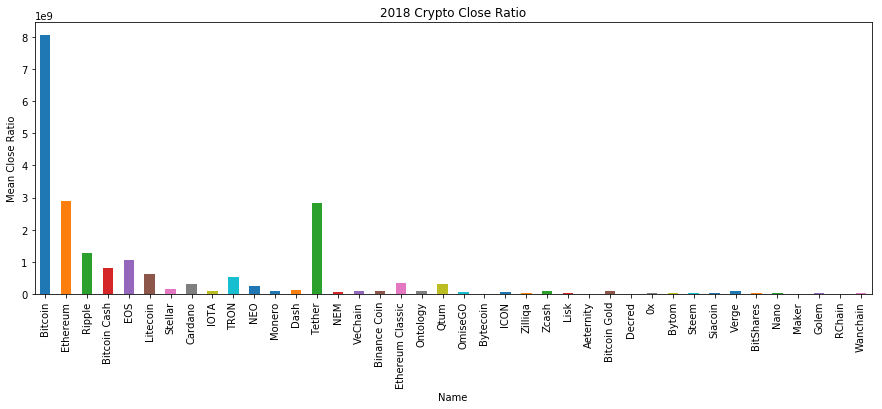

In [8]:
crp_closerate = df[(['date', 'ranknow', 'name', 'close_ratio'])]
crp_closerate = crp_closerate[crp_closerate['date']>='2018-01-01']
crp_closerate = crp_closerate.groupby('name').mean()
crp_closerate = crp_closerate.sort_values('ranknow')
crp_closerate = crp_closerate['close_ratio']

ax = crp_volume.head(40).plot(kind='bar', title='2018 Crypto Close Ratio', figsize=(15,5))
ax.set_xlabel("Name")
plt.xticks(rotation='vertical')
ax.set_ylabel("Mean Close Ratio")
plt.show()

One final factor we can look at to characterize the performance or ranks of crypto currencies are their close ratios. As mentioned in the Description of Data section, the close ratio, also known as the daily close rate, refers to the quotient of the close value minus the low value and the high value minus the low value. 

From this graph we observe the same pattern that we've seen from the Market Capitalization and Volume graphs in which the higher ranked coins have greater alues. But like the previous graphs, the rank is not ordered solely based on this factor. Once again we see that Tether has an incredibly high value compared to it's counterparts.

We can conclude that the performance, or rank of a cyrptocurrency is based on the combination of it's Market Cap Value (which directly relates to volume and price) and its Close Ratio.

Analytic Question

2.	Given the recent popularity in cryptocurrency, have we seen any growth their value since the start of 2018?

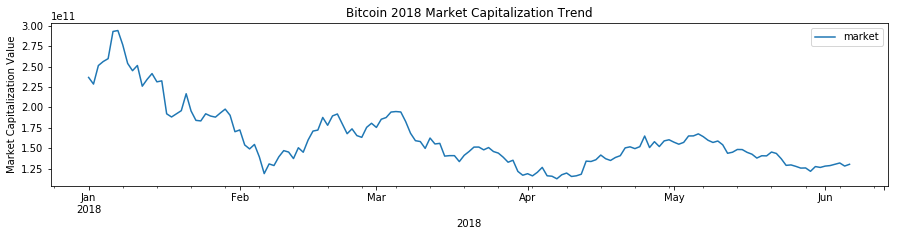

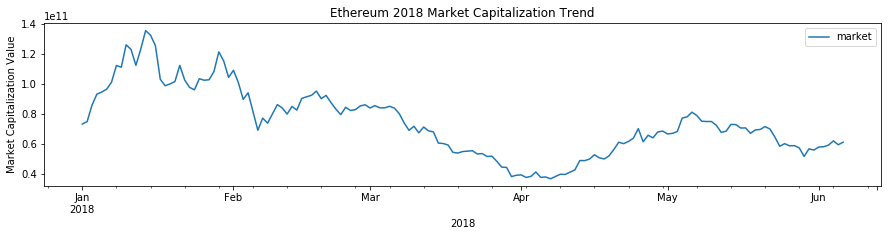

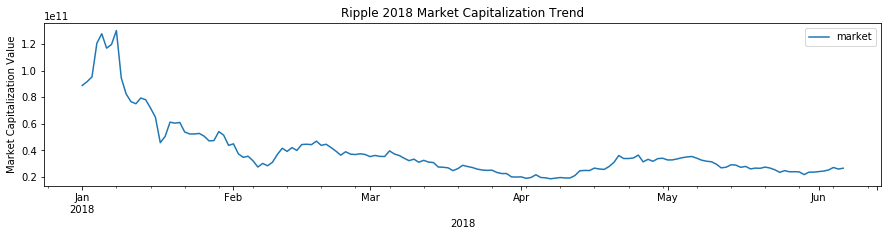

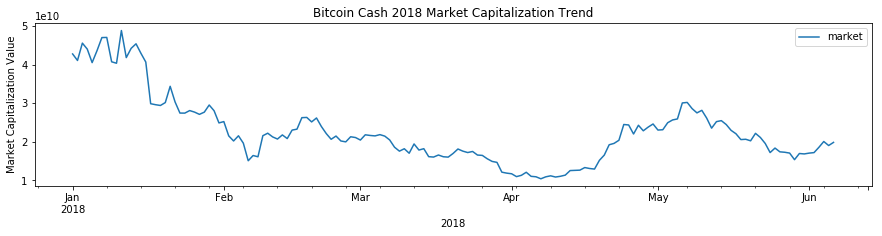

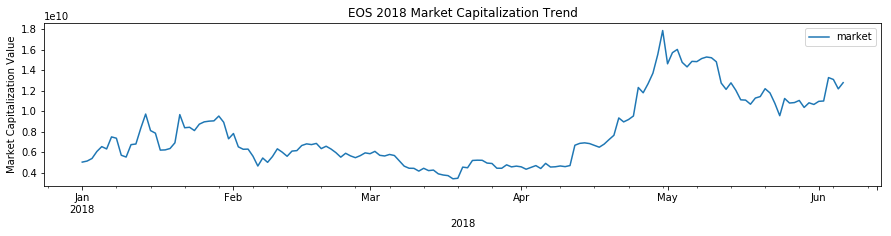

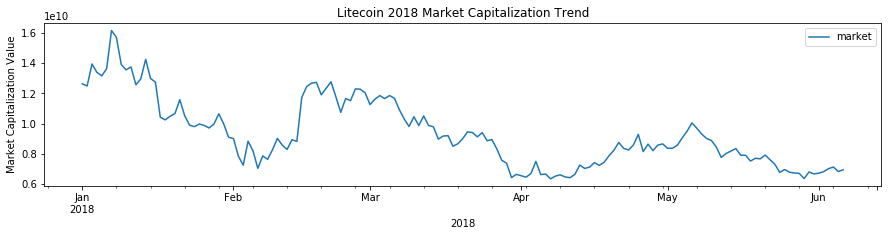

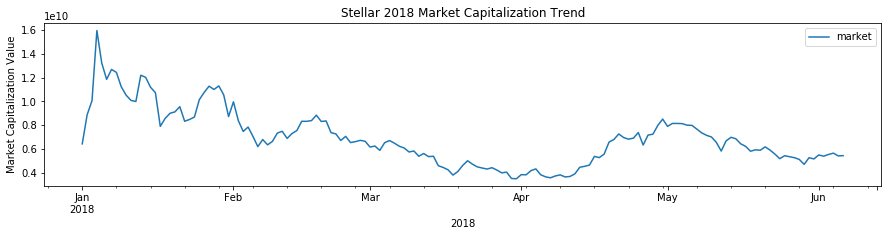

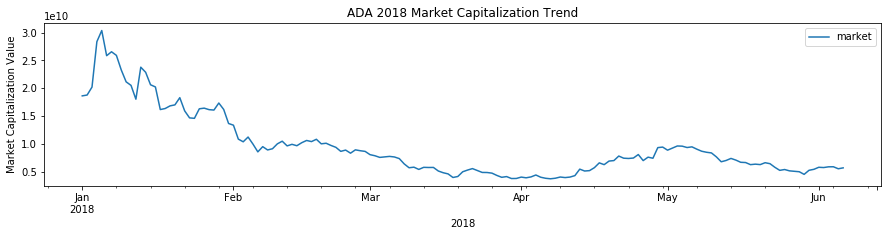

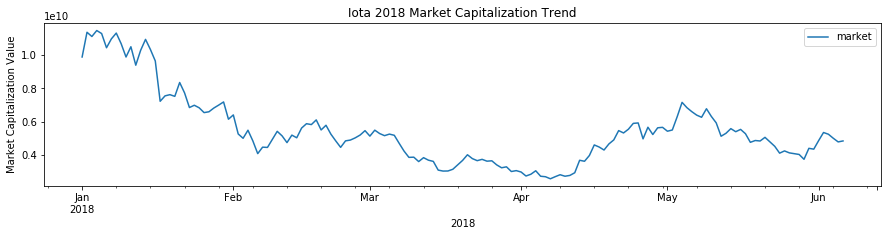

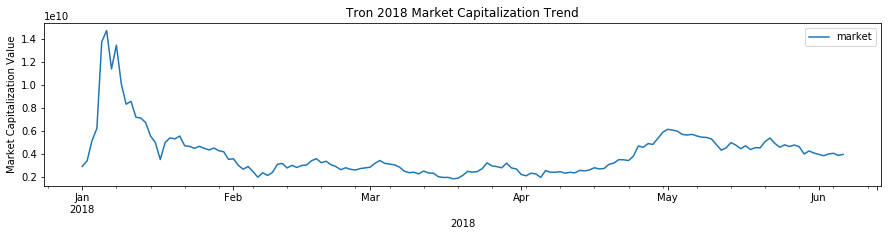

In [9]:
crpBTC = df[df['ranknow']==1]
crpBTC = crpBTC[(['date', 'market'])]
crpBTC = crpBTC[crpBTC['date']>='2018-01-01']
crpBTC = crpBTC.set_index('date')
bx = crpBTC.plot(figsize=(15,3), title='Bitcoin 2018 Market Capitalization Trend')
bx.set_xlabel('2018')
bx.set_ylabel('Market Capitalization Value')
plt.show()

crpETH = df[df['ranknow']==2]
crpETH = crpETH[(['date', 'market'])]
crpETH = crpETH[crpETH['date']>='2018-01-01']
crpETH = crpETH.set_index('date')
ax = crpETH.plot(figsize=(15,3), title='Ethereum 2018 Market Capitalization Trend')
ax.set_xlabel('2018')
ax.set_ylabel('Market Capitalization Value')
plt.show()

crpXRP = df[df['ranknow']==3]
crpXRP = crpXRP[(['date', 'market'])]
crpXRP = crpXRP[crpXRP['date']>='2018-01-01']
crpXRP = crpXRP.set_index('date')
ax = crpXRP.plot(figsize=(15,3), title='Ripple 2018 Market Capitalization Trend')
ax.set_xlabel('2018')
ax.set_ylabel('Market Capitalization Value')
plt.show()

crpBCH = df[df['ranknow']==4]
crpBCH = crpBCH[(['date', 'market'])]
crpBCH = crpBCH[crpBCH['date']>='2018-01-01']
crpBCH = crpBCH.set_index('date')
ax = crpBCH.plot(figsize=(15,3), title='Bitcoin Cash 2018 Market Capitalization Trend')
ax.set_xlabel('2018')
ax.set_ylabel('Market Capitalization Value')
plt.show()

crpEOS = df[df['ranknow']==5]
crpEOS = crpEOS[(['date', 'market'])]
crpEOS = crpEOS[crpEOS['date']>='2018-01-01']
crpEOS = crpEOS.set_index('date')
ax = crpEOS.plot(figsize=(15,3), title='EOS 2018 Market Capitalization Trend')
ax.set_xlabel('2018')
ax.set_ylabel('Market Capitalization Value')
plt.show()

crpLTC = df[df['ranknow']==6]
crpLTC = crpLTC[(['date', 'market'])]
crpLTC = crpLTC[crpLTC['date']>='2018-01-01']
crpLTC = crpLTC.set_index('date')
ax = crpLTC.plot(figsize=(15,3), title='Litecoin 2018 Market Capitalization Trend')
ax.set_xlabel('2018')
ax.set_ylabel('Market Capitalization Value')
plt.show()

crpXLM = df[df['ranknow']==7]
crpXLM = crpXLM[(['date', 'market'])]
crpXLM = crpXLM[crpXLM['date']>='2018-01-01']
crpXLM = crpXLM.set_index('date')
ax = crpXLM.plot(figsize=(15,3), title='Stellar 2018 Market Capitalization Trend')
ax.set_xlabel('2018')
ax.set_ylabel('Market Capitalization Value')
plt.show()

crpADA = df[df['ranknow']==8]
crpADA = crpADA[(['date', 'market'])]
crpADA = crpADA[crpADA['date']>='2018-01-01']
crpADA = crpADA.set_index('date')
ax = crpADA.plot(figsize=(15,3), title='ADA 2018 Market Capitalization Trend')
ax.set_xlabel('2018')
ax.set_ylabel('Market Capitalization Value')
plt.show()

crpMIOTA = df[df['ranknow']==9]
crpMIOTA = crpMIOTA[(['date', 'market'])]
crpMIOTA = crpMIOTA[crpMIOTA['date']>='2018-01-01']
crpMIOTA = crpMIOTA.set_index('date')
ax = crpMIOTA.plot(figsize=(15,3), title='Iota 2018 Market Capitalization Trend')
ax.set_xlabel('2018')
ax.set_ylabel('Market Capitalization Value')
plt.show()

crpTRX = df[df['ranknow']==10]
crpTRX = crpTRX[(['date', 'market'])]
crpTRX = crpTRX[crpTRX['date']>='2018-01-01']
crpTRX = crpTRX.set_index('date')
ax = crpTRX.plot(figsize=(15,3), title='Tron 2018 Market Capitalization Trend')
ax.set_xlabel('2018')
ax.set_ylabel('Market Capitalization Value')
plt.show()

The scatter plots above show the trend of the market cap value of each of the top 10 coins in 2018, between January 1st and June 6th. Each data point in the line plots are the market cap values for each day, so the line plots how the trend from day to day. Based on the visualizations, Bitcoin has seen an overall negative trend this year as its value decreased. This is interesting because it follows after its value skyrocketed in 2017. And despite having an overall decrease in value, we also observe a lot of variability in its trend as it tends to increase and decrease drastically each day. We see that its value fell very low in the beginning of February, but then rose again in March, only to decrease again in April.

Ripple and ADA also show a very clear negative trend. The other coins, however, show to much variability to determine whether the trend is negative and so makes it difficult to predict whether the trend will continue.

In [10]:
# Summary Statistics on Market Capitalization

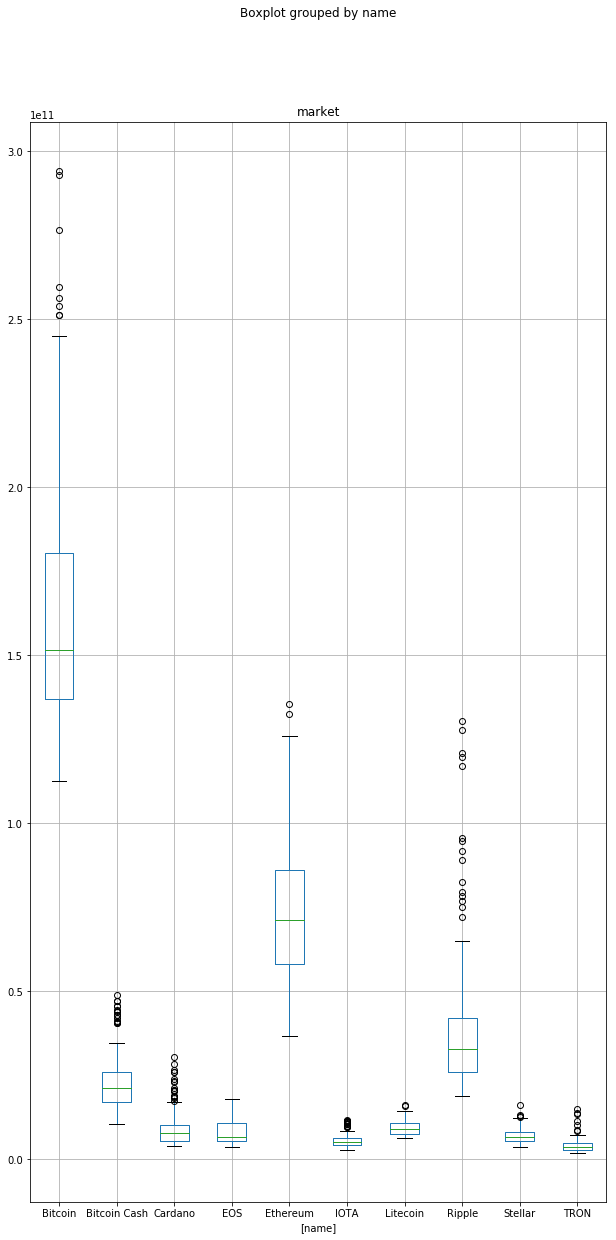

In [11]:
crp_spread = df[df['ranknow']<=10]
crp_spread = crp_spread[(['date', 'ranknow', 'name', 'market'])]
crp_spread = crp_spread[crp_spread['date']>='2018-01-01']
crp_spread = crp_spread.sort_values('ranknow')
crp_spread = crp_spread[['name', 'market']]
crp_spread.boxplot(by='name', figsize=(10,20))

Since we observed lots of variablitity in the trends given by the line plots, it's worth comparing the ranges of "Market Cap" values for each of the top 10 coins. The Boxplots above represent their market cap ranges for 2018. From a glance, we see that Bitcoin's range is far greater than any of the following coins. Despite having the highest median value, since it's range of historic market cap values are so large, it's difficult to predict how Bitcoin's value behave in the future.

Coins like IOTA and EOS, which have much smaller ranges, could be considered more trustworthy in the sense that we can have an accurate estimate about the market cap value in future, based on its past values. EOS in particular doesn't have any outliers, so its data is much more reliable for making decisions than the other top coins.

In [12]:
# Summary Statistics on Spread

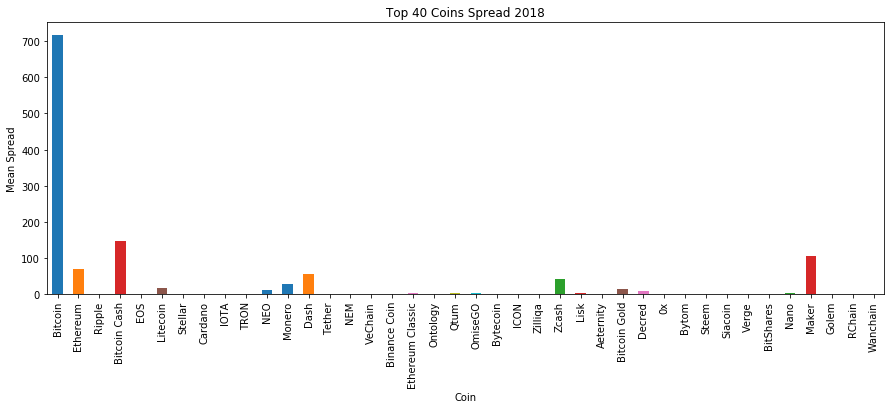

In [13]:
crp_spread = df[df['date']>='2018-01-01']
crp_spread = crp_spread[(['ranknow', 'name', 'spread'])]
crp_spread = crp_spread.groupby('name').mean()
crp_spread = crp_spread.sort_values('ranknow')
crp_spread = crp_spread['spread']

ax = crp_spread.head(40).plot(kind='bar', title='Top 40 Coins Spread 2018', figsize=(15,5))
ax.set_xlabel("Coin")
ax.set_ylabel("Mean Spread")
plt.show()

We can compare how widely values vary for each coin by looking at their mean spread. The Bar plot above shows the mean "Spread" of each of the top 40 ranked coins in 2018. Remembering that the spread of a coin refers to the difference between its highest and lowest price during open hours for that given day, it's apparent that Bitcoin has the widest range of variability amongst the top 40 coins.

Although Bitcoin is ranked the highest, we can conclude that its value is highly unstable and prone to a wide range of changes.

Analytic Question

3.	Are there any relationships between different cryptocurrencies?

In [14]:
# Sumarize Value counts for the coins compared

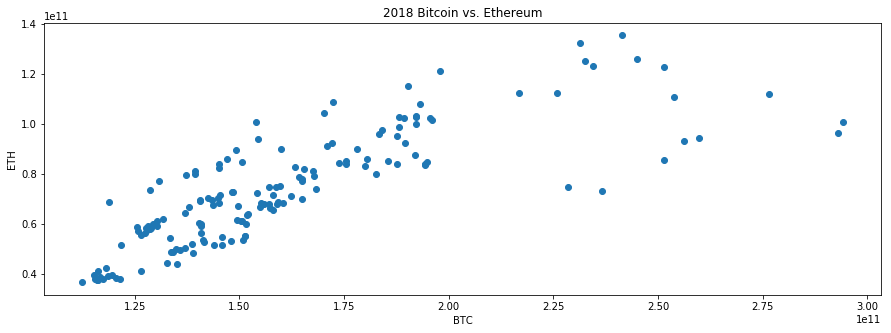

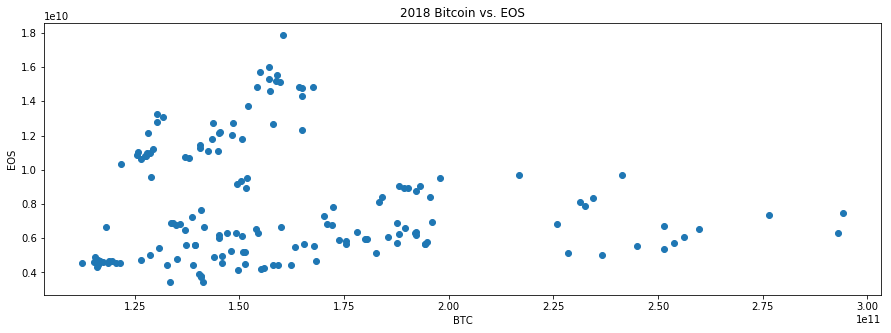

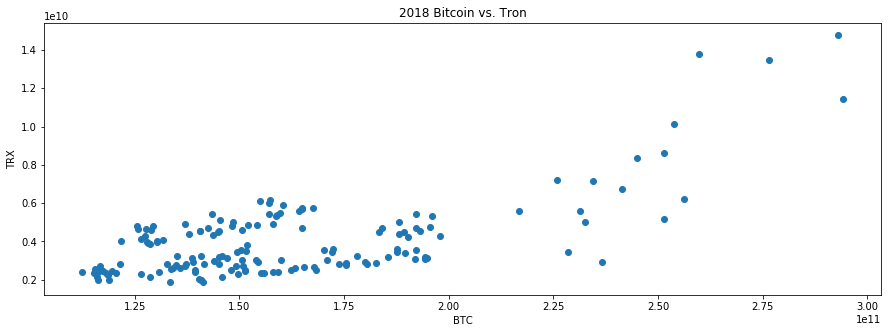

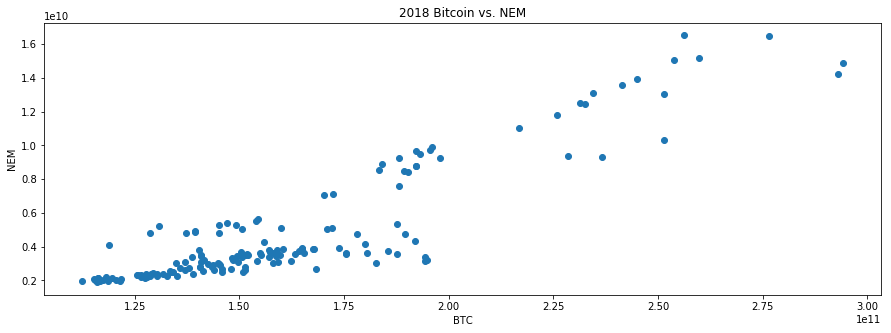

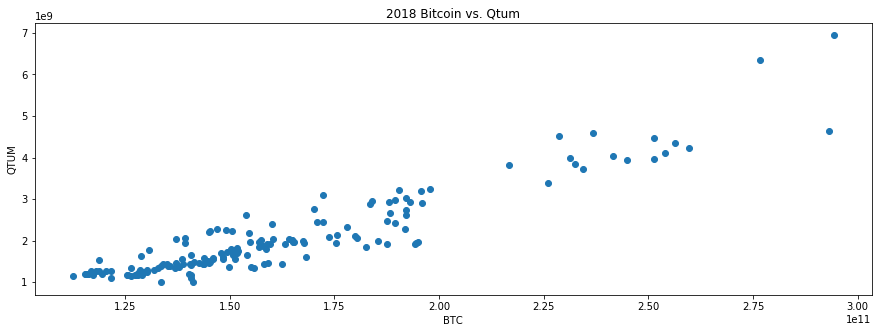

In [15]:
crp5 = df[df['ranknow']<=40]
crp5 = crp5[crp5['date']>='2018-01-01']
crp5 = crp5[(['ranknow', 'market'])]

crp_1 = crp5[crp5['ranknow']==1]
crp_1 = crp_1['market']
crp_2 = crp5[crp5['ranknow']==2]
crp_2 = crp_2['market']
crp_5 = crp5[crp5['ranknow']==5]
crp_5 = crp_5['market']
crp_10 = crp5[crp5['ranknow']==10]
crp_10 = crp_10['market']
crp_15 = crp5[crp5['ranknow']==15]
crp_15 = crp_15['market']
crp_20 = crp5[crp5['ranknow']==20]
crp_20 = crp_20['market']

plt.figure(figsize=(15,5))
plt.scatter(x=crp_1, y=crp_2)
plt.title('2018 Bitcoin vs. Ethereum')
plt.xlabel('BTC')
plt.ylabel('ETH')
plt.show()

plt.figure(figsize=(15,5))
plt.scatter(x=crp_1, y=crp_5)
plt.title('2018 Bitcoin vs. EOS')
plt.xlabel('BTC')
plt.ylabel('EOS')
plt.show()

plt.figure(figsize=(15,5))
plt.scatter(x=crp_1, y=crp_10)
plt.title('2018 Bitcoin vs. Tron')
plt.xlabel('BTC')
plt.ylabel('TRX')
plt.show()

plt.figure(figsize=(15,5))
plt.scatter(x=crp_1, y=crp_15)
plt.title('2018 Bitcoin vs. NEM')
plt.xlabel('BTC')
plt.ylabel('NEM')
plt.show()

plt.figure(figsize=(15,5))
plt.scatter(x=crp_1, y=crp_20)
plt.title('2018 Bitcoin vs. Qtum')
plt.xlabel('BTC')
plt.ylabel('QTUM')
plt.show()

The scatter plots above compares the market capitalization values of Bitcoin with 6 different coins; Etheruem, EOS, Tron, Nem and Qtum. In this case, we've kept Bitcoin as a constant so we can compare its Market Cap with other cryptocurrencies and see if there are any correlations. Although none of the plots show a deterministic correlation, some correlation does exist in each of the graphs, except for "Bitcoin vs. EOS". "Bitcoin vs Qtum" shows almost a linear relationship as does "Bitcoin vs. Ethereum". 

In each of these graphs (besides "Bitcoin vs. EOS"), we get the impression that as the value of certain cryptocurrency increases, Bitcoin's value increases and vise versa. This tells us that observing the Bitcoin market can possibly give us information on how other coin markets are doing as well.